#### Import the libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import datetime as dt
import re

#### Import the data

In [2]:
path = "C:\\Users\\Hen Abitbul\\Desktop\\כרייה וניתוח נתונים מתקדם בפייתון\\matalot\\matala2_cosmetics_2019-Nov.csv"
data = pd.read_csv(path,low_memory=False )

In [3]:
data1= data.copy()
# try to slice the data:
# .iloc[:50001].append(data.iloc[780000:800000]).append(data.iloc[1780000:1800000]).append(data.iloc[2780000:2800000])

# Q1-

#### Covert the column "event_time" to datetime

In [4]:
data1['event_time']= pd.to_datetime(data1['event_time'])

#### Before diff function we need to sort the values 
#### on the column that we want to do the diffrences and the grouby

In [5]:
data1= data1.sort_values(['user_session', 'event_time']) 

In [6]:
data2= data1.copy()
data2['duration_to_next_event']= data2.groupby('user_session')['event_time'].diff().shift(periods=-1).fillna(pd.Timedelta(seconds=0))
data2.head(20)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event
522763,2019-11-05 07:57:05+00:00,view,5829298,1487580011585077370,NaN,farmstay,0.79,556321594,00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04,00:00:00
1443597,2019-11-11 12:15:10+00:00,view,5771614,2193074740619379535,furniture.living_room.cabinet,kosmekka,150.79,570103701,00001bc6-1e04-4861-be5d-1bc73929c21a,00:00:00
1933123,2019-11-15 03:50:03+00:00,view,5568472,1487580005595612013,NaN,NaN,3.0,571677620,00001e77-5db8-4e96-ab7a-022ed3caf8b3,00:00:00
1662416,2019-11-13 04:37:37+00:00,view,5864850,1487580005268456287,NaN,NaN,12.7,504468592,00004c7d-9507-474e-a559-0fdaccaaa390,00:00:00
1800687,2019-11-14 03:59:32+00:00,view,5861620,1487580008263189483,NaN,lador,2.25,571211128,0000597b-de39-4a77-9fe5-02c8792ca14e,00:00:56
1800717,2019-11-14 04:00:28+00:00,view,5861619,1487580008246412266,NaN,lador,6.38,571211128,0000597b-de39-4a77-9fe5-02c8792ca14e,00:01:35
1800759,2019-11-14 04:02:03+00:00,view,5861591,1487580009143992338,NaN,lador,2.22,571211128,0000597b-de39-4a77-9fe5-02c8792ca14e,00:00:00
284392,2019-11-03 12:45:44+00:00,view,5846437,1487580013950664926,NaN,browxenna,45.24,473600495,00005ac0-5c22-4756-bb12-31b90af75fa3,00:00:11
284416,2019-11-03 12:45:55+00:00,view,5846436,1487580013950664926,NaN,browxenna,45.24,473600495,00005ac0-5c22-4756-bb12-31b90af75fa3,00:00:00
2046636,2019-11-15 22:03:28+00:00,view,5847576,1982860263572898112,NaN,concept,7.78,530580938,0000645a-8160-4a3d-91bf-154bff0a22e3,00:04:47


# Q2-

#### Adding the column "funnel" 

In [7]:
data1= data1.sort_values(['user_id', 'event_time']) 
data1['funnel']= data1.groupby('user_id')['event_time'].diff().apply(lambda x: pd.Timedelta(x).days)

#### Checking a sequence of visits (sessions) of the same user to the site with no more than 5 days difference

In [8]:
data1['bigger_than5']= np.where(data1['funnel']>=5,1,0)
data1['funnel_number']= data1.groupby('user_id')['bigger_than5'].cumsum()+1

#### For example

In [9]:
#data1[data1['user_id']== 566307474]

# Q3-

#### Taking a copy data and droping the duplicates in "user_session" (leaving the unique ones)

In [10]:
data3= data1.copy()
data3.drop_duplicates(subset='user_session', inplace=True)

#### Contain the number of the visit (session) on that panel 

In [11]:
data3['index_in_funnel'] = data3.groupby(['user_id','funnel_number'])['user_session'].cumcount() + 1
data3 =data3.drop(['event_time', 'event_type', 'product_id', 'category_id','category_code',
                   'brand', 'price', 'user_id', 'funnel','bigger_than5', 'funnel_number'], axis=1)

#### Merged data1 and data3 to view the requested data

In [12]:
merged_df = pd.merge(data1, data3, on='user_session', how='right')
merged_df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,funnel,bigger_than5,funnel_number,index_in_funnel
0,2019-11-04 15:28:57+00:00,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,NaN,0,1,1
1,2019-11-19 09:56:09+00:00,view,5711145,1487580005008409427,NaN,f.o.x,6.03,1458813,b16644a2-44db-4650-8156-f6f03782d432,NaN,0,1,1
2,2019-11-19 11:14:48+00:00,view,5814066,1487580005855658874,NaN,grattol,2.3,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,0.0,0,1,2
3,2019-11-20 11:58:06+00:00,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,1.0,0,1,3
4,2019-11-20 11:58:27+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,0.0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4635832,2019-11-30 23:56:14+00:00,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,0.0,0,1,1
4635833,2019-11-30 23:56:17+00:00,view,5900651,1487580013950664926,NaN,NaN,19.52,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,0.0,0,1,1
4635834,2019-11-30 23:56:21+00:00,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,0.0,0,1,1
4635835,2019-11-30 23:56:46+00:00,view,5790563,1487580008263189483,NaN,NaN,7.14,579968937,878af093-7570-48ae-966c-d50ce61e390c,NaN,0,1,1


# Q4-

#### Built a function that remove texts from the column beyond the price itself 
#### and convert the value in the field to float with regular expressions 

In [13]:
def convert (txt):
    pattern = r"[^0-9.]"
    return re.sub(pattern, "", txt)

In [14]:
data1['price'] =data1['price'].apply(convert) 
data1

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,funnel,bigger_than5,funnel_number
437209,2019-11-04 15:28:57+00:00,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,NaN,0,1
2483241,2019-11-19 09:56:09+00:00,view,5711145,1487580005008409427,NaN,f.o.x,6.03,1458813,b16644a2-44db-4650-8156-f6f03782d432,NaN,0,1
2494623,2019-11-19 11:14:48+00:00,view,5814066,1487580005855658874,NaN,grattol,2.3,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,0.0,0,1
2640971,2019-11-20 11:58:06+00:00,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,1.0,0,1
2641003,2019-11-20 11:58:27+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4635733,2019-11-30 23:56:14+00:00,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,0.0,0,1
4635736,2019-11-30 23:56:17+00:00,view,5900651,1487580013950664926,NaN,NaN,19.52,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,0.0,0,1
4635737,2019-11-30 23:56:21+00:00,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,0.0,0,1
4635752,2019-11-30 23:56:46+00:00,view,5790563,1487580008263189483,NaN,NaN,7.14,579968937,878af093-7570-48ae-966c-d50ce61e390c,NaN,0,1


# Q5-

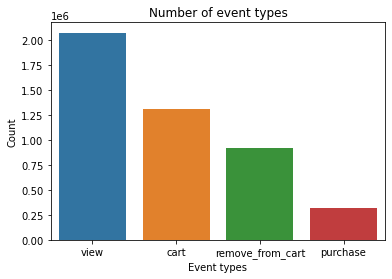

In [15]:
import seaborn as sns

# Create the count plot
sns.countplot(x="event_type", data=data1)

# Add labels and title
plt.xlabel("Event types")
plt.ylabel("Count")
plt.title("Number of event types")

# Show the plot
plt.show()

# Q6-

#### Create a new dataframe named session_data where each row represents a visit to the site and includes the requested columns

#### Total number of events performed by the user on that visit

In [16]:
data6= data1.copy()
data6['total_events']= data1.groupby('user_session')['event_type'].transform('count')

#### Duration of visit to the site

In [17]:
# Group the data by 'user_session'
grouped = data6.groupby('user_session')

# Calculate the duration of each session
temp = grouped['event_time'].max() - grouped['event_time'].min()

data6 = pd.merge(data6, temp, on='user_session', how='right')

data6 = data6.rename(columns={'event_time_y': 'session_duration'}) 
# To check:
# data6[data6['user_id']== 566307474]

#### Columns- 'list_of_viewed','list_of_added_to_cart','list_of_purchased'

#### Agg function on product id to make a list of product

In [18]:
patient_level_df = data6.groupby(['user_session','event_type']).agg(
{
    'product_id': lambda x: list(set(x))
}).reset_index()

# To check: 
# patient_level_df[patient_level_df['user_session']== '1ce54758-7e12-3960-4a02-ad0ceb2ea8d0']

#### After the grouby, make a pivot table because it is more convenient to work on the data

In [19]:
# pivot the data by user_session and event_type
pivot_df = patient_level_df.pivot_table(index='user_session', columns='event_type', values='product_id', aggfunc='first')

# reset the index to make the user_session a regular column
result = pivot_df.reset_index()
result

event_type,user_session,cart,purchase,remove_from_cart,view
0,00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04,NaN,NaN,NaN,[5829298]
1,00001bc6-1e04-4861-be5d-1bc73929c21a,NaN,NaN,NaN,[5771614]
2,00001e77-5db8-4e96-ab7a-022ed3caf8b3,NaN,NaN,NaN,[5568472]
3,00004c7d-9507-474e-a559-0fdaccaaa390,NaN,NaN,NaN,[5864850]
4,0000597b-de39-4a77-9fe5-02c8792ca14e,NaN,NaN,NaN,"[5861619, 5861620, 5861591]"
...,...,...,...,...,...
942017,ffff5096-a5d3-4abf-b34b-9627203bb025,NaN,NaN,NaN,[5790563]
942018,ffff5954-5b7f-4dd8-9fa1-078ae32e684f,NaN,NaN,NaN,"[5588154, 5676246]"
942019,ffff8044-2a22-4846-8a72-999e870abbe9,NaN,NaN,NaN,[5847328]
942020,ffffbe0a-d2c2-47c7-afab-680bfdfda50d,NaN,NaN,NaN,[5528034]


#### Drop the duplicates

In [20]:
data6.drop_duplicates(subset='user_session', inplace=True)
data6

,event_time_x,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,funnel,bigger_than5,funnel_number,total_events,session_duration
0,2019-11-04 15:28:57+00:00,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,NaN,0,1,1.0,00:00:00
1,2019-11-19 09:56:09+00:00,view,5711145,1487580005008409427,NaN,f.o.x,6.03,1458813,b16644a2-44db-4650-8156-f6f03782d432,NaN,0,1,1.0,00:00:00
2,2019-11-19 11:14:48+00:00,view,5814066,1487580005855658874,NaN,grattol,2.3,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,0.0,0,1,1.0,00:00:00
3,2019-11-20 11:58:06+00:00,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,1.0,0,1,28.0,01:03:09
31,2019-11-21 06:02:40+00:00,view,5711087,1487580005008409427,NaN,f.o.x,6.03,1458813,ad1a2e9e-cc14-4b98-b70b-5dd539e76bba,0.0,0,1,1.0,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4635015,2019-11-30 23:50:13+00:00,view,5881428,1487580013506068678,NaN,lovely,14.29,579967088,670cb8b4-bef1-4ec7-bfe8-7c8317967c74,NaN,0,1,1.0,00:00:00
4635016,2019-11-30 23:53:24+00:00,view,5873630,1487580009471148064,NaN,irisk,3.97,579968012,547ad51a-cdf2-4a0a-b819-8061c012bcee,NaN,0,1,1.0,00:00:00
4635017,2019-11-30 23:55:43+00:00,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,NaN,0,1,5.0,00:00:38
4635022,2019-11-30 23:56:46+00:00,view,5790563,1487580008263189483,NaN,NaN,7.14,579968937,878af093-7570-48ae-966c-d50ce61e390c,NaN,0,1,1.0,00:00:00


#### Merge between the data6 and result and keep the relevant columns

In [21]:
data6 = pd.merge(data6, result, on='user_session', how='right')

In [22]:
data6.columns=['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session', 'funnel',
       'bigger_than5', 'funnel_number', 'total_events', 'session_duration',
       'list_of_added_to_cart', 'list_of_purchased', 'remove_from_cart', 'list_of_viewed']

In [23]:
data6 = pd.merge(data6, data3, on='user_session', how='right')

#### Session data

In [24]:
session_data= data6.drop(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'funnel', 'bigger_than5', 'remove_from_cart'], axis=1)

session_data.dropna(subset=['user_id'], inplace=True)
session_data

,user_id,user_session,funnel_number,total_events,session_duration,list_of_added_to_cart,list_of_purchased,list_of_viewed,index_in_funnel
0,1120748.0,d0484d94-7ac1-44e8-a310-2360da11ad9d,1.0,1.0,00:00:00,NaN,NaN,[5240],1
1,1458813.0,b16644a2-44db-4650-8156-f6f03782d432,1.0,1.0,00:00:00,NaN,NaN,[5711145],1
2,1458813.0,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,1.0,1.0,00:00:00,NaN,NaN,[5814066],2
3,1458813.0,921ff98c-a419-4132-af94-ee26880334b0,1.0,28.0,01:03:09,NaN,NaN,"[5905673, 5905674, 5711117, 5542414, 5711122, ...",3
4,1458813.0,ad1a2e9e-cc14-4b98-b70b-5dd539e76bba,1.0,1.0,00:00:00,NaN,NaN,[5711087],4
...,...,...,...,...,...,...,...,...,...
942017,579967088.0,670cb8b4-bef1-4ec7-bfe8-7c8317967c74,1.0,1.0,00:00:00,NaN,NaN,[5881428],1
942018,579968012.0,547ad51a-cdf2-4a0a-b819-8061c012bcee,1.0,1.0,00:00:00,NaN,NaN,[5873630],1
942019,579968623.0,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,1.0,5.0,00:00:38,NaN,NaN,"[5886282, 5892179, 5900651]",1
942020,579968937.0,878af093-7570-48ae-966c-d50ce61e390c,1.0,1.0,00:00:00,NaN,NaN,[5790563],1
